# Large Bubbles Detection with the red ligths

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Image Shape:  (1216, 1936)
Image min:  5
Image max:  255


Text(0, 0.5, 'Frequency')

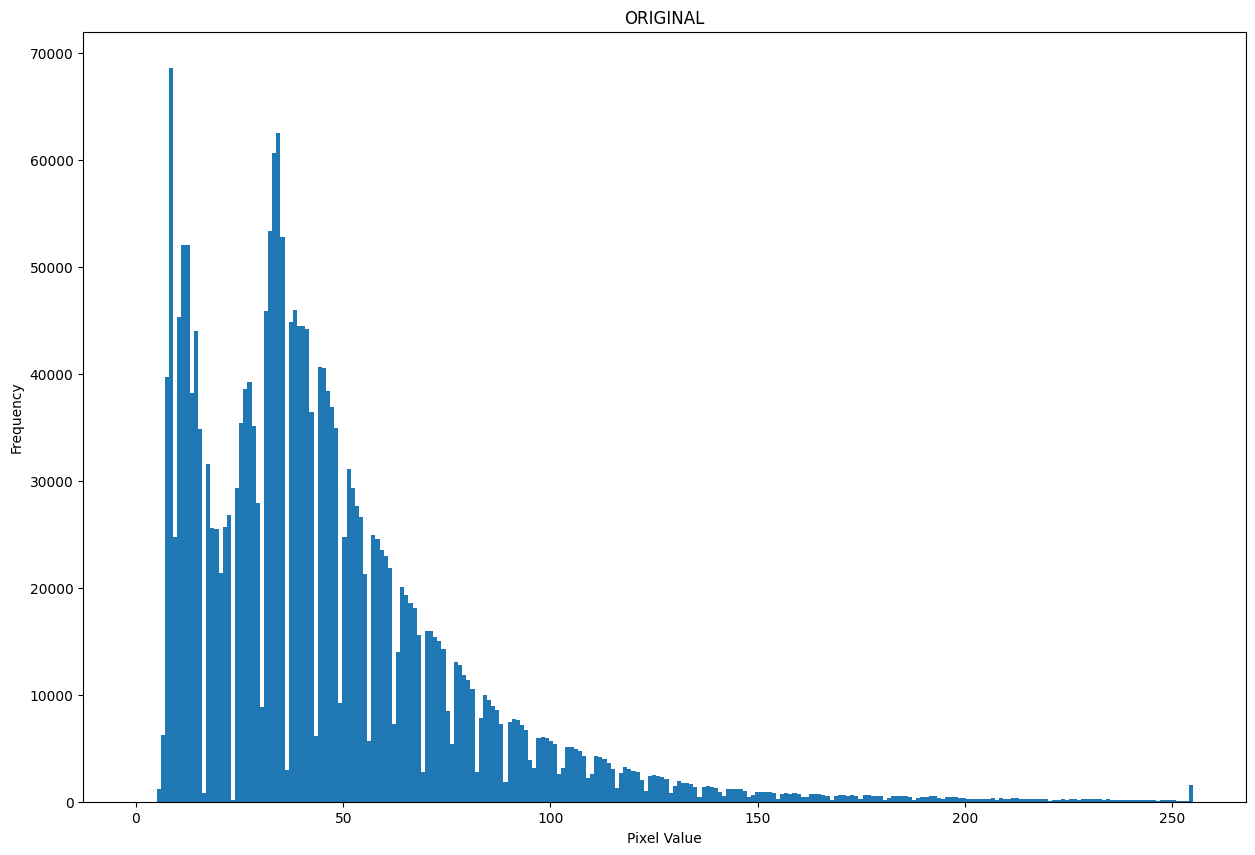

In [9]:
# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "FINAL_PHOTOS", "BUBBLES_RED_LIGHT")

# Read the image in grayscale
img = cv.imread(os.path.join(folder, "1.png"))

# Based on the ligth used we read only the red channel
_ , _, r_img = cv.split(img)

print("Image Shape: ", r_img.shape)
print("Image min: ", r_img.min())
print("Image max: ", r_img.max())

img_shown = cv.resize(r_img, (800, 600))

# The image is shown
#cv.imshow('Loaded Image', img_shown) # We show the found corners in the image
#cv.waitKey(1000)
#cv.destroyAllWindows()


# We show the histogram of the image
plt.figure(figsize=(15, 10))
plt.hist(r_img.ravel(), bins=256, range=(0, 255))
plt.title("ORIGINAL")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

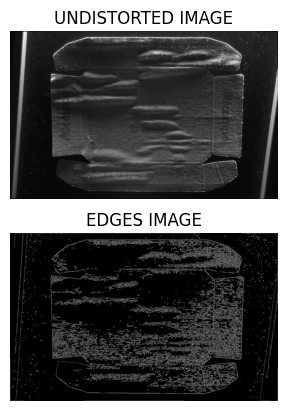

In [ ]:
cameraParameters = np.load(baseFolder + "/calibration/camera_lens_12mm.npz")

# We extract the camera matrix and distortion coefficients, through the keys in the dictionary
mtx = cameraParameters['mtx']
dist = cameraParameters['dist']
res = cameraParameters['res']

# We find the dimensions of the image
h, w = r_img.shape[:2]

# We find the new camera matrix and interested region
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# We undistort the image
udst_img = cv.undistort(r_img, mtx, dist, None, newcameramtx)

edges = cv.Canny(udst_img, 30, 80, L2gradient=True)

maxContour = 


plt.Figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.imshow(udst_img, cmap='grey')
plt.axis("off")
plt.title("UNDISTORTED IMAGE")
plt.subplot(2,1,2)
plt.imshow(edges, cmap='grey')
plt.axis("off")
plt.title("EDGES IMAGE")
plt.show()

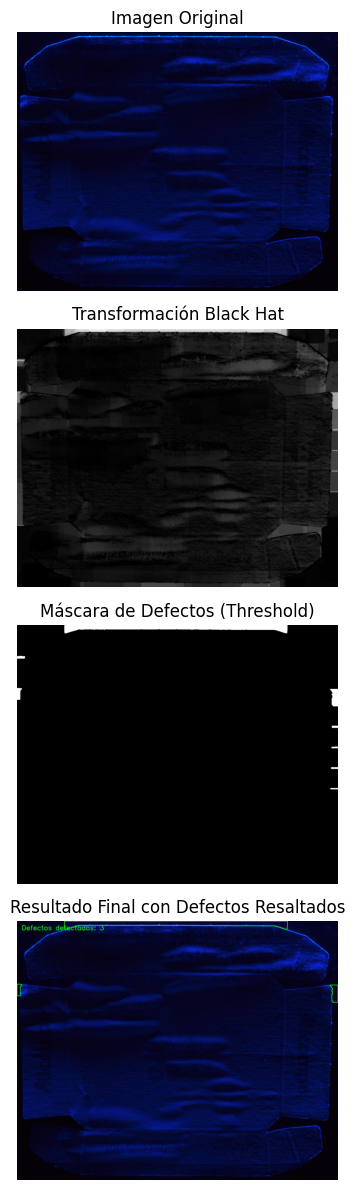

In [10]:
# Get the current working directory
baseFolder = os.getcwd()

# Define the folder containing the images
folder = os.path.join(baseFolder, "FINAL_PHOTOS", "BUBBLES_RED_LIGHT")

# Read the image in grayscale
image = cv.imread(os.path.join(folder, "1_cropped.png"))

if image is None:
    print("No se pudo cargar la imagen. Revisa la ruta.")
else:
    # 2. Preprocessing: Convertir a escala de grises
    # Dado que la imagen es muy rojiza, la conversión a grises
    # conservará bien las variaciones de intensidad.
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Aplicar un ligero desenfoque para suavizar la textura y reducir el ruido
    gray = cv.GaussianBlur(gray, (5, 5), 0)

    # 3. Transformación Morfológica "Black Hat"
    # Esta operación resalta las áreas oscuras en fondos claros.
    # Necesitamos un "kernel" o elemento estructurante. Su tamaño debe ser
    # más grande que los defectos que queremos detectar.
    # Experimenta con este tamaño (ej. 35x35, 45x45) para obtener mejores resultados.
    kernel_size = (75, 75)
    kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)
    
    # Aplicamos la transformación blackhat
    blackhat = cv.morphologyEx(gray, cv.MORPH_BLACKHAT, kernel)

    # 4. Umbralización (Thresholding)
    # Después del blackhat, los defectos son áreas brillantes.
    # Los convertimos a una máscara binaria.
    # El valor 20 es el umbral; ajústalo si es necesario.
    _, thresh = cv.threshold(blackhat, 80, 255, cv.THRESH_BINARY)
    
    # Opcional: Dilatar la máscara para hacer los defectos más sólidos
    thresh = cv.dilate(thresh, None, iterations=2)

    # 5. Encontrar y Filtrar Contornos
    # Buscamos los contornos en la máscara
    contours, _ = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Preparamos una copia de la imagen original para dibujar los resultados
    output_image = image.copy()
    
    min_defect_area = 500  # Área mínima para ser considerado un defecto (ajústala)
    detected_defects = 0

    for contour in contours:
        # Filtramos por área para eliminar el ruido
        if cv.contourArea(contour) > min_defect_area:
            detected_defects += 1
            # Dibujamos el contorno del defecto en verde sobre la imagen original
            cv.drawContours(output_image, [contour], -1, (0, 255, 0), 2)

    # Añadir texto con el número de defectos detectados
    cv.putText(output_image, f"Defectos detectados: {detected_defects}", (20, 40), 
                cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


    # 6. Mostrar los resultados
    plt.figure(figsize=(20, 12))
    plt.subplot(4, 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Imagen Original')
    plt.axis('off')
    plt.subplot(4, 1, 2)
    plt.imshow(blackhat, cmap='gray')
    plt.title('Transformación Black Hat')
    plt.axis('off')
    plt.subplot(4, 1, 3)
    plt.imshow(thresh, cmap='gray')
    plt.title('Máscara de Defectos (Threshold)')
    plt.axis('off')
    plt.subplot(4, 1, 4)
    plt.imshow(output_image, cmap='gray')
    plt.title('Resultado Final con Defectos Resaltados')
    plt.axis('off')
    plt.tight_layout()
    plt.show()